1. Задания на создание массивов Numpy и простейшие операции над ними. В данных заданиях
используйте генераторы случайных чисел, число уникальных значениях должно быть 4-9, и
лежать в пределах от 1 до 10.  
1.1. Создайте массивы V1, V2, V3 – типа int и размерности 10 элементов  
1.2. Создайте вектор V, объединив вертикально (один под другим) V1, V2, V3  
1.3. Создайте матрицу M размерности 30 x 30, типа int.  
1.4. Сложите поэлементно массивы V1 и V2  
1.5. Сравните массивы V1 и V2 и найдите несовпадающие значения  
2. Задания на индексацию (поиск и сортировку значений) массивов Numpy  
2.1. Выберите из матрицы M – значение ячейки из последнего столбца и последней строки  
2.2. Выберите из матрицы M – строки с 10 по 20, и столбцы с 5 по 6  
2.3. Найдите второе по убыванию значение матрицы M  
2.4. Извлеките диагональные элементы из матрицы M  
2.5. Найдите в матрице M значения больше 5 ( создайте маску для матрицы)  
3. Задания на манипуляцию массивами Numpy  
3.1. Измените тип данных массива V на строковый  
3.2. Обратите массив V (первое значение должно стать последним и наоборот)  
3.3. Сделайте матрицу M плоским массивом  
3.4. Переделайте форму вектора V на матрицу размерности 5 x 2  
3.5. Удалите из вектора V значения меньше 2.  
4. Задания на статистические операции  
4.1. Рассчитайте среднее, медиану и дисперсию по вектору V  
4.2. Рассчитайте среднее, медиану и дисперсию по матрице M  
4.3. Постройте эмпирическую функцию плотности распределения вектора V, визуализируйте
полученную функцию с помощью matplotlib.  
4.4. Рассчитайте матрицу корреляции для матрицы M  
4.5. Создайте два случайных вектора размерности 10, типа int, каждый из которых содержит 3
уникальных значения, и проверьте гипотезу о их независимости с помощью критерия Хи-
квадрат  
5. Задания на векторную и матричную алгебру  
5.1. Умножьте матрицу M на вектор V.  
5.2. Найдите определитель матрицы M  
5.3. Найдите скалярное произведение векторов V и транспонированного V  
5.4. Решите систему уравнений MX=V  
5.5. Рассчитайте собственные значения и собственные вектора для матрицы M  
6. Скачайте два изображения товаров с Wildberries из одной категории (мужские костюмы),
преобразуйте их в многомерные массивы Numpy и определите расстояние Евклида между
ними.  
7. Реализуйте метод главных компонент с помощью модуля Numpy и нахождения собственных
векторов. Преобразуйте одну из картинок из п.6 в матрицу новых компонент, меньшей
размерности и визуализируйте ее.  
8. Кластеризуйте одну из картинок из п.6 – выделите отдельно брюки и отдельно пиджак на
изображении. Можете использовать метод K-means.  
9. Определите цвет фона картинки из п.8 – найдите наиболее частый цвет в матрице, и по
вектору (R,G,B) в matplotlib, выведите полученный цвет.  
10. Выберите картинку из п.6 и примените к ней фильтр Калмана.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.linalg import eig, det, solve
from sklearn.cluster import KMeans
from PIL import Image

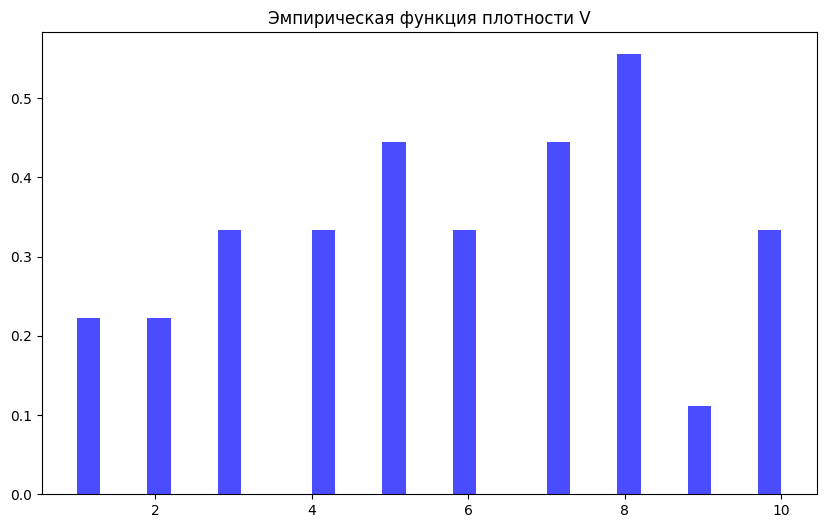

Есть основая принять 0 гипотезу, что вектора независимы


In [2]:

np.random.seed(42)
V1 = np.random.randint(1, 11, 10)
V2 = np.random.randint(1, 11, 10)
V3 = np.random.randint(1, 11, 10)


V = np.concatenate([V1, V2, V3])


M = np.random.randint(1, 11, (30, 30))


V1_plus_V2 = V1 + V2


non_matching = V1 != V2


last_element = M[-1, -1]


submatrix = M[9:20, 4:6]


unique_sorted = np.unique(M)
second_largest = unique_sorted[-2] if len(unique_sorted) > 1 else unique_sorted[0]


diagonal = np.diag(M)


mask = M > 5


V_str = V.astype(str)


V_reversed = V[::-1]


M_flat = M.flatten()


V_reshaped = V[:10].reshape(5, 2)


V_filtered = V[V >= 2]


v_mean = np.mean(V)
v_median = np.median(V)
v_var = np.var(V)


m_mean = np.mean(M)
m_median = np.median(M)
m_var = np.var(M)


plt.figure(figsize=(10, 6))
plt.hist(V, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Эмпирическая функция плотности V')
plt.show()


correlation_matrix = np.corrcoef(M)


vec1 = np.random.choice([1, 5, 9], 10)
vec2 = np.random.choice([2, 6, 10], 10)
contingency_table = np.zeros((len(np.unique(vec1)), len(np.unique(vec2))))
for i, val1 in enumerate(np.unique(vec1)):
    for j, val2 in enumerate(np.unique(vec2)):
        contingency_table[i, j] = np.sum((vec1 == val1) & (vec2 == val2))
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
if p_value < 0.05:
    print('Есть основая отвергнуть 0 гипотезу, что вектора независимы')
else:
    print('Есть основая принять 0 гипотезу, что вектора независимы')

V_padded = np.pad(V[:30], (0, max(0, 30 - len(V))), mode='constant')
M_dot_V = M.dot(V_padded)

M_det = det(M)


dot_product = np.dot(V, V)


X = solve(M, V_padded)

eigenvalues, eigenvectors = eig(M)

In [3]:
def process_image(pic_file):
    img = np.asarray(Image.open(pic_file).convert('RGB'))
    return img
pic1 = "data/1.jpg"
pic2 = "data/2.jpg"
img1 = process_image(pic1)
img2 = process_image(pic2)
img1_flat = img1.flatten()
img2_flat = img2.flatten()
euclidean_distance = np.linalg.norm(img1 - img2)
euclidean_distance

np.float64(153195.4658173668)

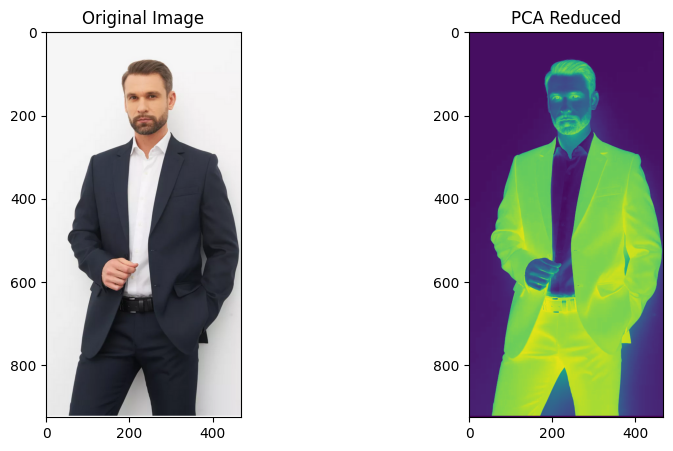

In [4]:
def pca(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvals, eigenvecs = eig(cov_matrix)
    idx = eigenvals.argsort()[::-1]
    eigenvecs_sorted = eigenvecs[:, idx]
    components = eigenvecs_sorted[:, :n_components]
    return X_centered.dot(components)
img_flat = img1.reshape(-1, 3)
# print(img_flat.shape)
img_pca = pca(img_flat, 2)
# print(img_pca.shape)
img_reconstructed = img_pca.reshape(img1.shape[0], img1.shape[1], 2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed[:, :, 0], cmap='viridis')
plt.title('PCA Reduced')
plt.show()

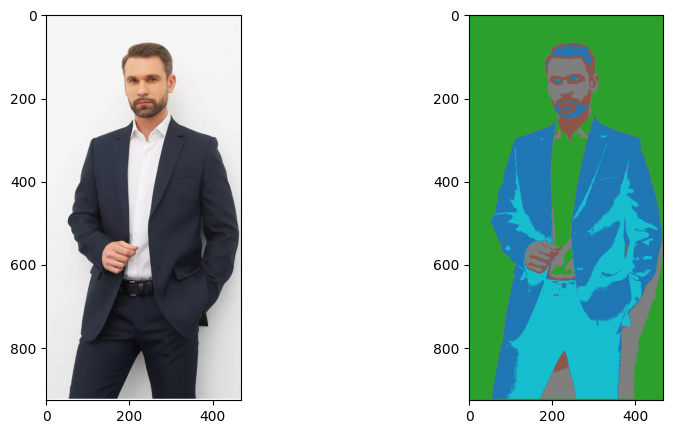

In [5]:
img_flat = img1.reshape(-1, 3)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(img_flat)
segmented = labels.reshape(img1.shape[0], img1.shape[1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='tab10')
plt.show()

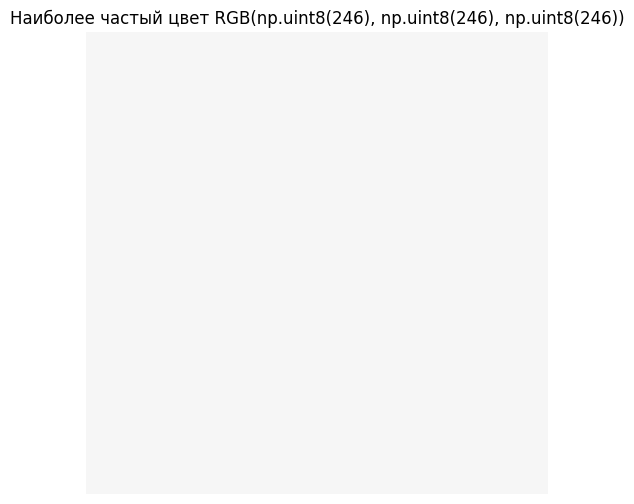

In [6]:
colors, counts = np.unique(img1.reshape(-1, 3), axis=0, return_counts=True)
background_color = colors[counts.argmax()]
plt.figure(figsize=(6, 6))
plt.imshow([[background_color / 255.0]])
plt.title(f'Наиболее частый цвет RGB{tuple(background_color)}')
plt.axis('off')
plt.show()

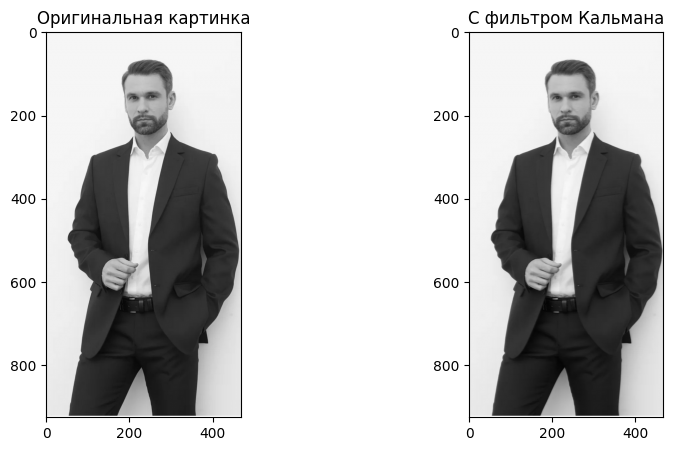

In [7]:
class KalmanFilter:
    def __init__(self, F, H, Q, R, P, x):
        self.F = F
        self.H = H
        self.Q = Q
        self.R = R
        self.P = P
        self.x = x
    
    def predict(self):
        self.x = self.F @ self.x
        self.P = self.F @ self.P @ self.F.T + self.Q
    
    def update(self, z):
        y = z - self.H @ self.x
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.x = self.x + K @ y
        self.P = (np.eye(len(self.x)) - K @ self.H) @ self.P

img_gray = np.mean(img1, axis=2)
F = np.eye(1)
H = np.eye(1)
Q = np.eye(1) * 0.1
R = np.eye(1) * 0.1
P = np.eye(1)
x = np.array([img_gray[0, 0]])

kf = KalmanFilter(F, H, Q, R, P, x)
filtered_img = np.zeros_like(img_gray)

for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        kf.predict()
        kf.update(np.array([img_gray[i, j]]))
        filtered_img[i, j] = kf.x[0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Оригинальная картинка')
plt.subplot(1, 2, 2)
plt.title('С фильтром Кальмана')
plt.imshow(filtered_img, cmap='gray')
plt.show()